In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기 (파일명은 실제 파일명으로 변경)
df = pd.read_csv('data/전국 화재 현황_csv_2023_전국.csv')

# 1. 데이터 기본 정보 확인
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38934 entries, 0 to 38933
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WRINV_NO                  38934 non-null  int64  
 1   FIRE_TYPE_NM              38934 non-null  object 
 2   BLDG_SRTFRM_NM            25145 non-null  object 
 3   BLDG_STRCTR_NM            25145 non-null  object 
 4   BLDG_SRTRF_NM             25145 non-null  object 
 5   BLDG_RSCU_DNGCT           23771 non-null  float64
 6   GRND_NOFL                 25120 non-null  float64
 7   UDGD_NOFL                 20686 non-null  float64
 8   BLDG_GFA                  25143 non-null  float64
 9   BTTM_AREA                 25135 non-null  float64
 10  BLDG_STTS_NM              25108 non-null  object 
 11  SPFPTG_NM                 12654 non-null  object 
 12  SMTPR_LCLSF_NM            15136 non-null  object 
 13  SMTPR_SCLSF_NM            15136 non-null  object 
 14  DTH_CN

In [3]:
# 날짜 컬럼 변환
date_cols = ['WRINV_NO', 'RCPT_DT', 'DSPT_DT', 'GRNDS_ARVL_DT', 'BGNN_POTFR_DT', 'PRFECT_POTFR_DT', 'CBK_DT']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 결측치 확인
print(df.isnull().sum())

WRINV_NO                        0
FIRE_TYPE_NM                    0
BLDG_SRTFRM_NM              13789
BLDG_STRCTR_NM              13789
BLDG_SRTRF_NM               13789
BLDG_RSCU_DNGCT             15163
GRND_NOFL                   13814
UDGD_NOFL                   18248
BLDG_GFA                    13791
BTTM_AREA                   13799
BLDG_STTS_NM                13826
SPFPTG_NM                   26280
SMTPR_LCLSF_NM              23798
SMTPR_SCLSF_NM              23798
DTH_CNT                         0
INJPSN_CNT                      0
HNL_DAM_CNT                     0
PRPT_DAM_AMT                    0
DOW_NM                          0
FRSTN_NM                      500
CNTR_NM                       623
RCPT_DT                         0
DSPT_DT                         0
GRNDS_ARVL_DT                   0
BGNN_POTFR_DT                   0
PRFECT_POTFR_DT                 0
CBK_DT                          0
DSPT_REQ_HR                     0
FIRE_SUPESN_HR                  0
CTPV_NM       

In [4]:
# 화재 유형별 건수
fire_type_counts = df['FIRE_TYPE_NM'].value_counts()
print(fire_type_counts)

# 사망자, 부상자, 인명피해, 재산피해의 기본 통계
print(df[['DTH_CNT', 'INJPSN_CNT', 'HNL_DAM_CNT', 'PRPT_DAM_AMT']].describe())

FIRE_TYPE_NM
건축,구조물         25108
기타(쓰레기 화재등)     7435
자동차,철도차량        4736
임야              1521
선박,항공기            97
위험물,가스제조소등        37
Name: count, dtype: int64
            DTH_CNT    INJPSN_CNT   HNL_DAM_CNT  PRPT_DAM_AMT
count  38934.000000  38934.000000  38934.000000  3.893400e+04
mean       0.007269      0.056429      0.063698  2.452095e+04
std        0.093305      0.429770      0.449489  9.351488e+05
min        0.000000      0.000000      0.000000  0.000000e+00
25%        0.000000      0.000000      0.000000  9.600000e+01
50%        0.000000      0.000000      0.000000  5.500000e+02
75%        0.000000      0.000000      0.000000  3.559750e+03
max        4.000000     37.000000     38.000000  1.763463e+08


In [5]:
# 사망자, 부상자, 인명피해, 재산피해의 기본 통계
print(df[['DTH_CNT', 'INJPSN_CNT', 'HNL_DAM_CNT', 'PRPT_DAM_AMT']].describe())

            DTH_CNT    INJPSN_CNT   HNL_DAM_CNT  PRPT_DAM_AMT
count  38934.000000  38934.000000  38934.000000  3.893400e+04
mean       0.007269      0.056429      0.063698  2.452095e+04
std        0.093305      0.429770      0.449489  9.351488e+05
min        0.000000      0.000000      0.000000  0.000000e+00
25%        0.000000      0.000000      0.000000  9.600000e+01
50%        0.000000      0.000000      0.000000  5.500000e+02
75%        0.000000      0.000000      0.000000  3.559750e+03
max        4.000000     37.000000     38.000000  1.763463e+08


In [6]:
# 건물구조식명별 화재 건수 및 평균 피해금액
bldg_stats = df.groupby('BLDG_SRTFRM_NM').agg(
    FIRE_COUNT=('WRINV_NO', 'count'),
    AVG_DAMAGE=('PRPT_DAM_AMT', 'mean')
).sort_values('FIRE_COUNT', ascending=False)
print(bldg_stats)

                FIRE_COUNT    AVG_DAMAGE
BLDG_SRTFRM_NM                          
양식(옥)                19316  32347.984417
조립식                   2551  50570.961976
기타 식                  2271  26831.811977
한식(옥)                  950  11989.382105
절충식                     43  34529.000000
일식                      10   4889.600000
기타                       4   8288.000000


In [7]:
# 요일별 화재 발생 건수
weekday_counts = df['DOW_NM'].value_counts()
print(weekday_counts)

DOW_NM
월    5734
금    5609
수    5608
토    5538
일    5494
화    5482
목    5469
Name: count, dtype: int64


In [8]:
# 시도명/시군구명별 화재 건수
region_counts = df.groupby(['CTPV_NM', 'SGG_NM'])['WRINV_NO'].count().sort_values(ascending=False)
print(region_counts)

CTPV_NM  SGG_NM
경기도      화성시       612
         평택시       464
경상남도     김해시       444
서울특별시    강남구       422
경기도      김포시       391
                  ... 
강원도      삼척시         3
         강릉시         2
         홍천군         1
         춘천시         1
         동해시         1
Name: WRINV_NO, Length: 256, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

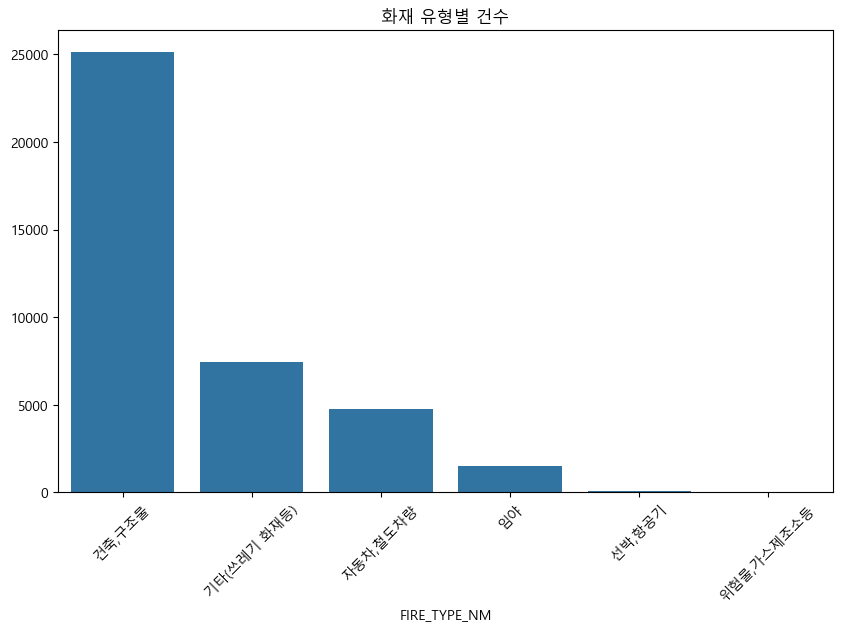

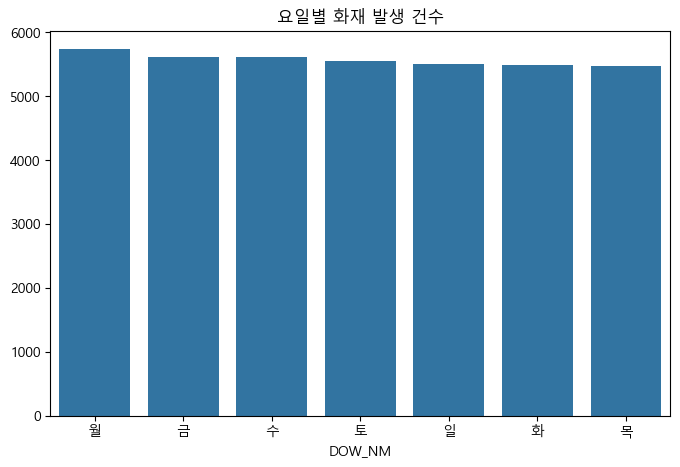

In [10]:
# 한글 폰트 설정 (Windows 기준, 나눔고딕 사용)
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 화재 유형별 건수 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=fire_type_counts.index, y=fire_type_counts.values)
plt.title('화재 유형별 건수')
plt.xticks(rotation=45)
plt.show()

# 요일별 화재 건수 시각화
plt.figure(figsize=(8,5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title('요일별 화재 발생 건수')
plt.show()

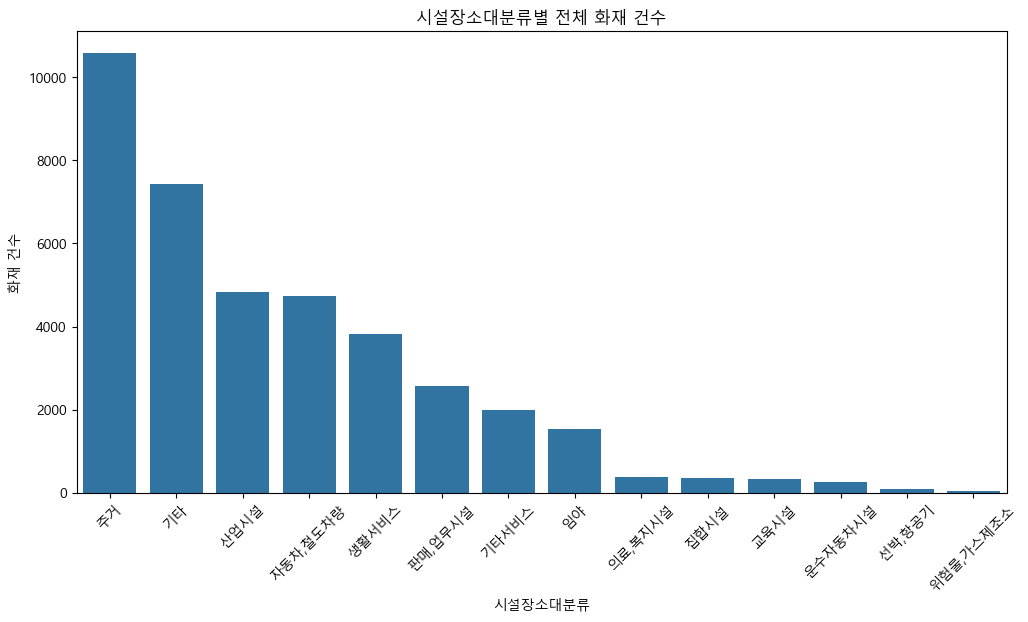

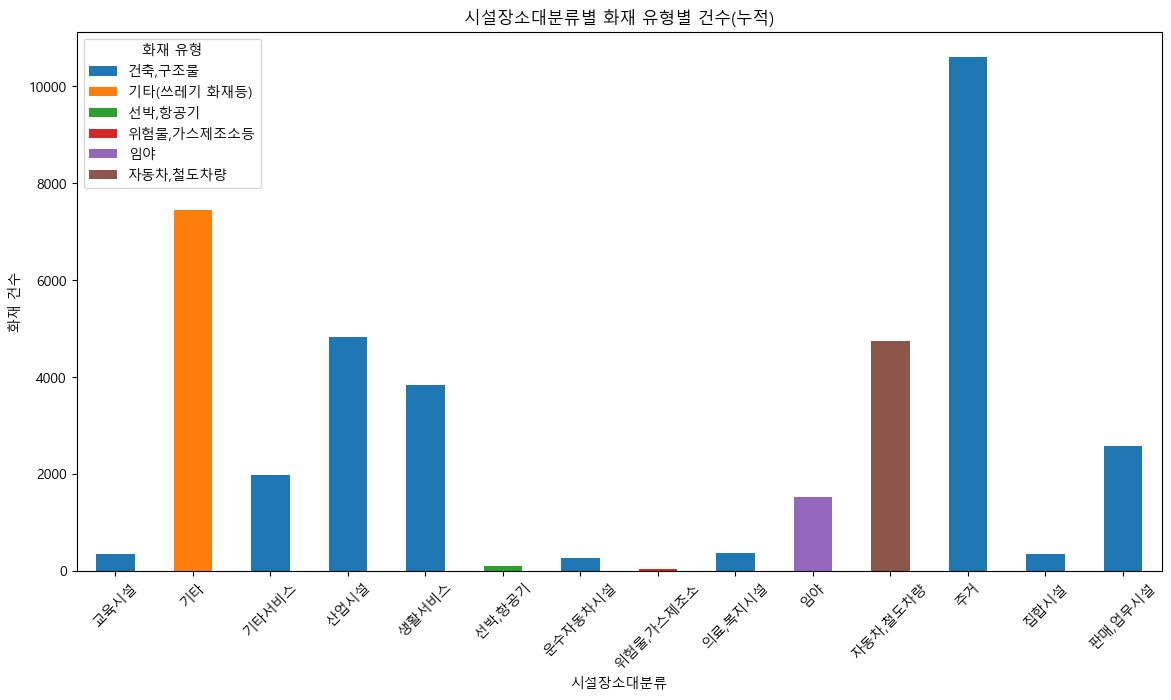

In [11]:
# 한글 폰트 설정 (Windows 기준, 맑은고딕 사용)
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 시설장소대분류별(FCLT_PLC_LCLSF_NM) 화재 유형별 건수 집계
facility_fire_type = df.groupby(['FCLT_PLC_LCLSF_NM', 'FIRE_TYPE_NM'])['WRINV_NO'].count().reset_index()
facility_pivot = facility_fire_type.pivot(index='FCLT_PLC_LCLSF_NM', columns='FIRE_TYPE_NM', values='WRINV_NO').fillna(0)

# 1. 시설장소대분류별 전체 화재 건수
facility_counts = df['FCLT_PLC_LCLSF_NM'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=facility_counts.index, y=facility_counts.values)
plt.title('시설장소대분류별 전체 화재 건수')
plt.xlabel('시설장소대분류')
plt.ylabel('화재 건수')
plt.xticks(rotation=45)
plt.show()

# 2. 시설장소대분류별 화재 유형별 건수 (Stacked Bar)
facility_pivot.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('시설장소대분류별 화재 유형별 건수(누적)')
plt.xlabel('시설장소대분류')
plt.ylabel('화재 건수')
plt.xticks(rotation=45)
plt.legend(title='화재 유형')
plt.show()

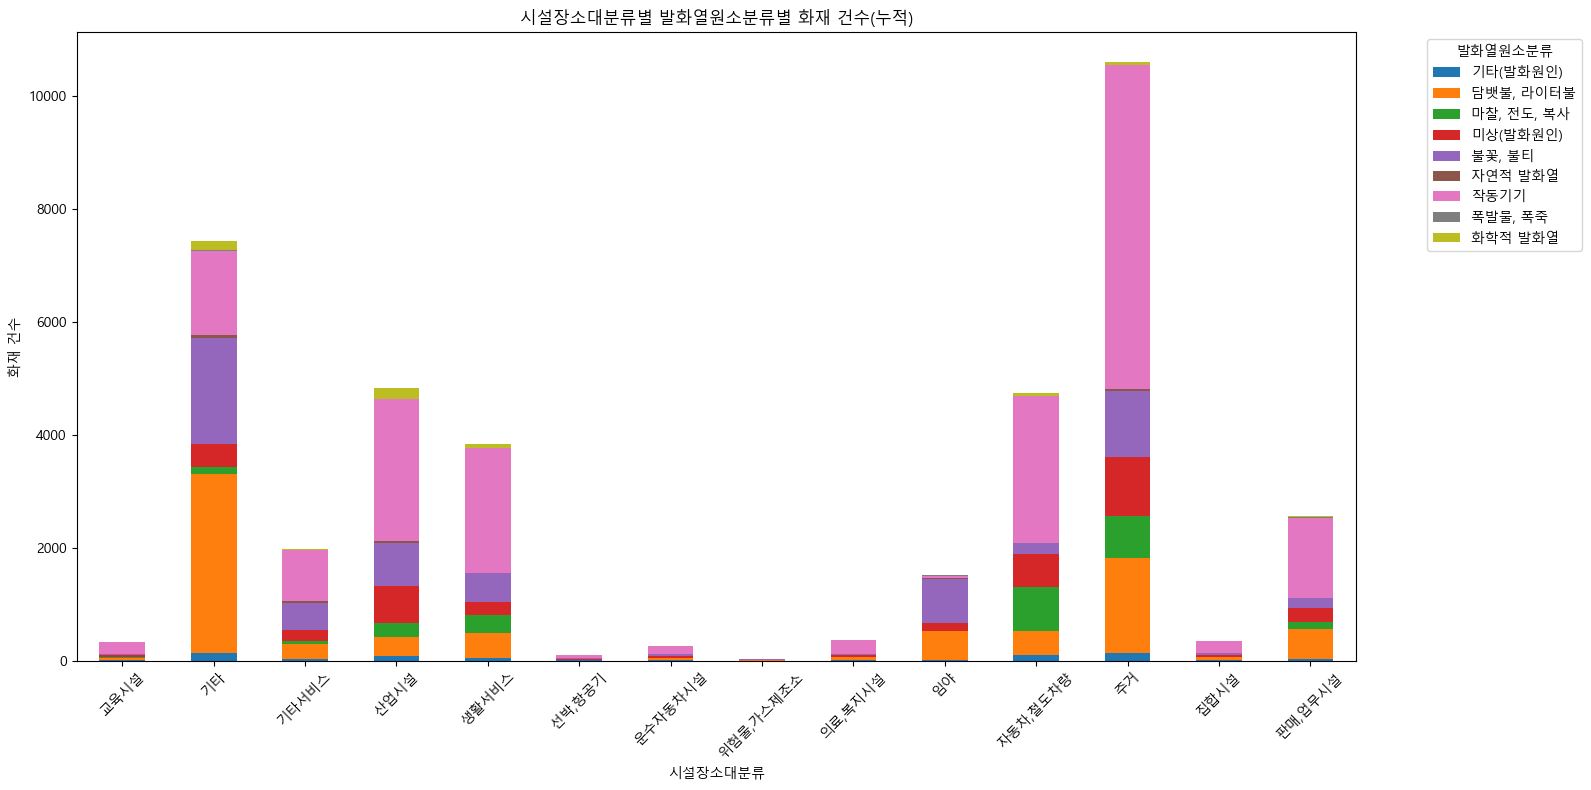

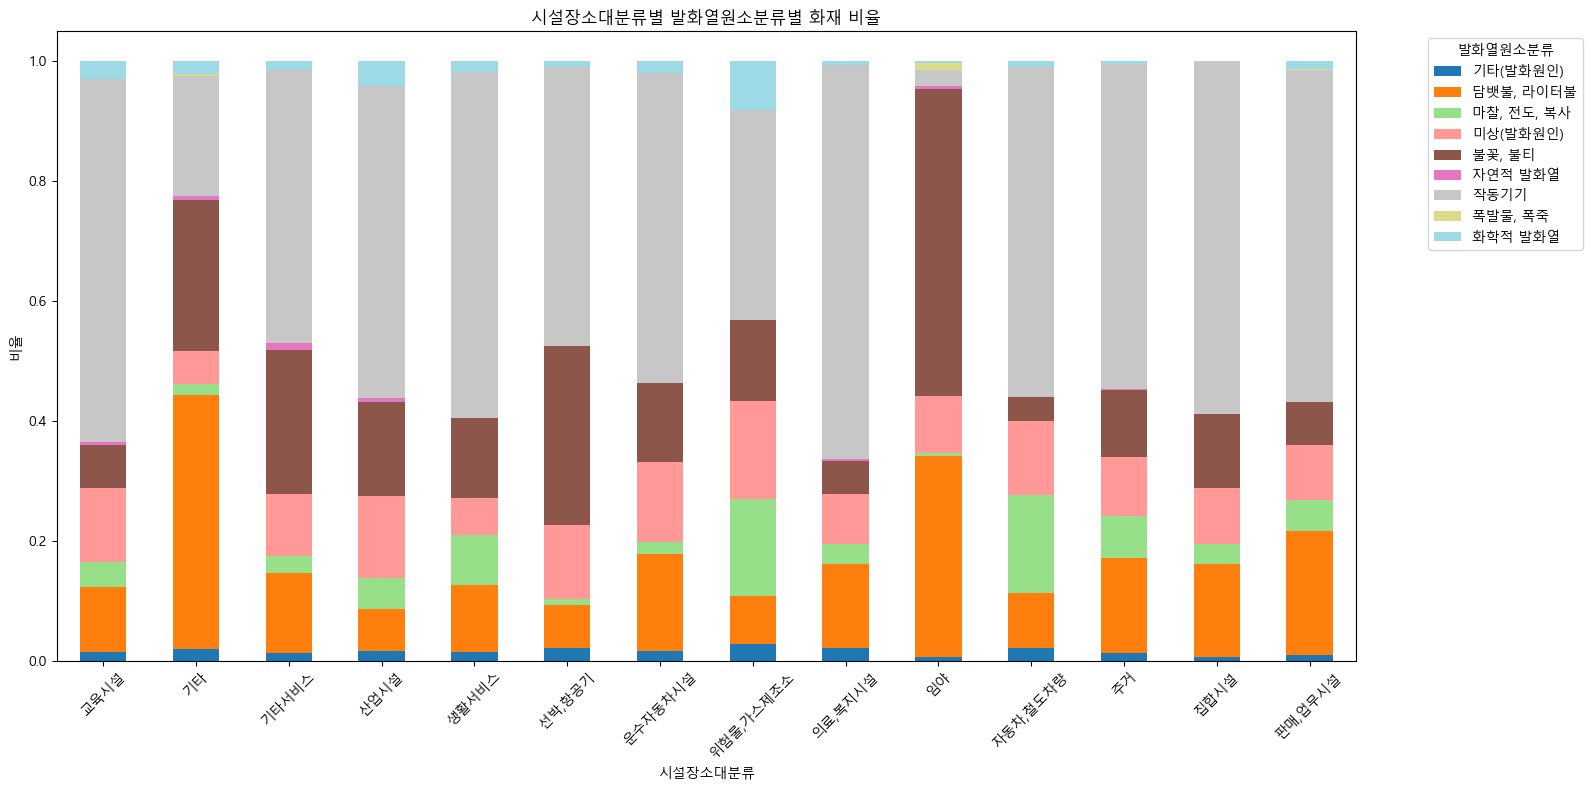

In [12]:
# 한글 폰트 설정 (Windows 기준, 맑은고딕 사용)
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 시설장소대분류별(FCLT_PLC_LCLSF_NM) 발화열원소분류명(IGTN_HTSRC_SCLSF_NM)별 건수 집계
facility_htsrc_type = df.groupby(['FCLT_PLC_LCLSF_NM', 'IGTN_HTSRC_SCLSF_NM'])['WRINV_NO'].count().reset_index()
facility_htsrc_pivot = facility_htsrc_type.pivot(index='FCLT_PLC_LCLSF_NM', columns='IGTN_HTSRC_SCLSF_NM', values='WRINV_NO').fillna(0)

# 1. 시설장소대분류별 발화열원소분류별 건수 (Stacked Bar)
facility_htsrc_pivot.plot(kind='bar', stacked=True, figsize=(16,8))
plt.title('시설장소대분류별 발화열원소분류별 화재 건수(누적)')
plt.xlabel('시설장소대분류')
plt.ylabel('화재 건수')
plt.xticks(rotation=45)
plt.legend(title='발화열원소분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. 시설장소대분류별 발화열원소분류별 비율 (비율 시각화)
facility_htsrc_ratio = facility_htsrc_pivot.div(facility_htsrc_pivot.sum(axis=1), axis=0)
facility_htsrc_ratio.plot(kind='bar', stacked=True, figsize=(16,8), colormap='tab20')
plt.title('시설장소대분류별 발화열원소분류별 화재 비율')
plt.xlabel('시설장소대분류')
plt.ylabel('비율')
plt.xticks(rotation=45)
plt.legend(title='발화열원소분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

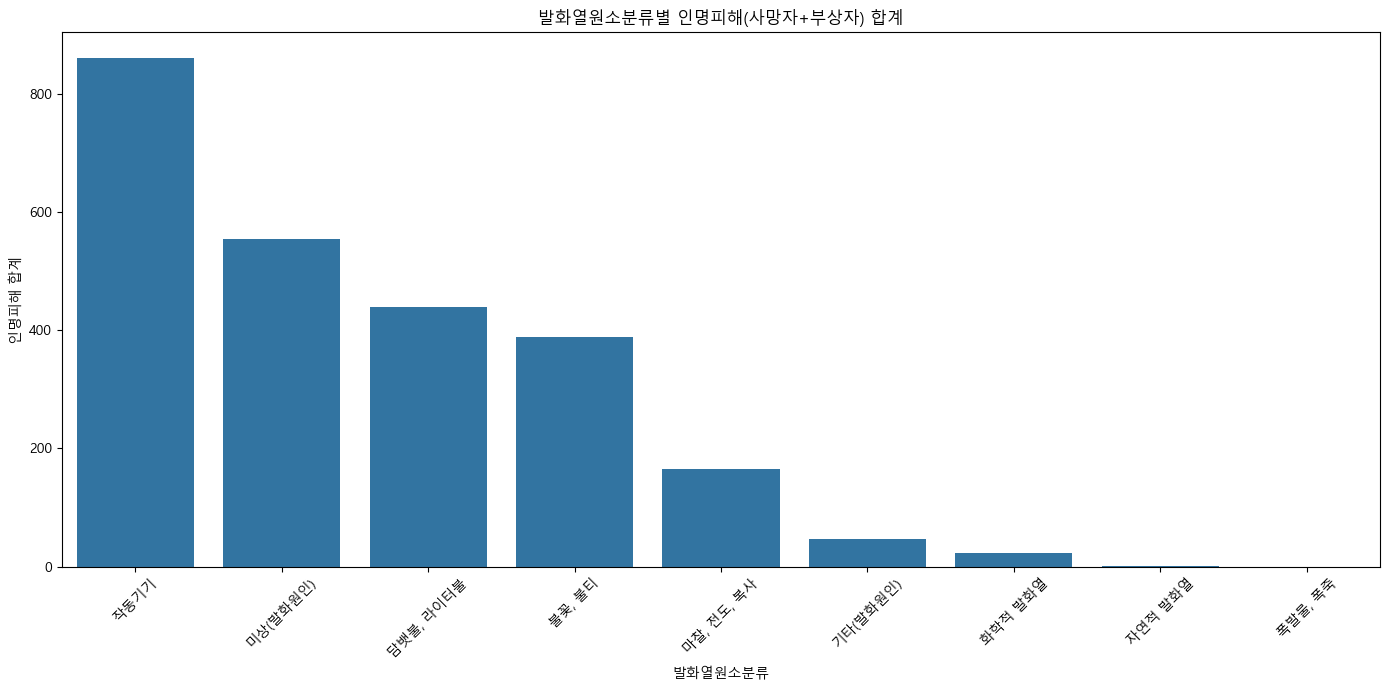

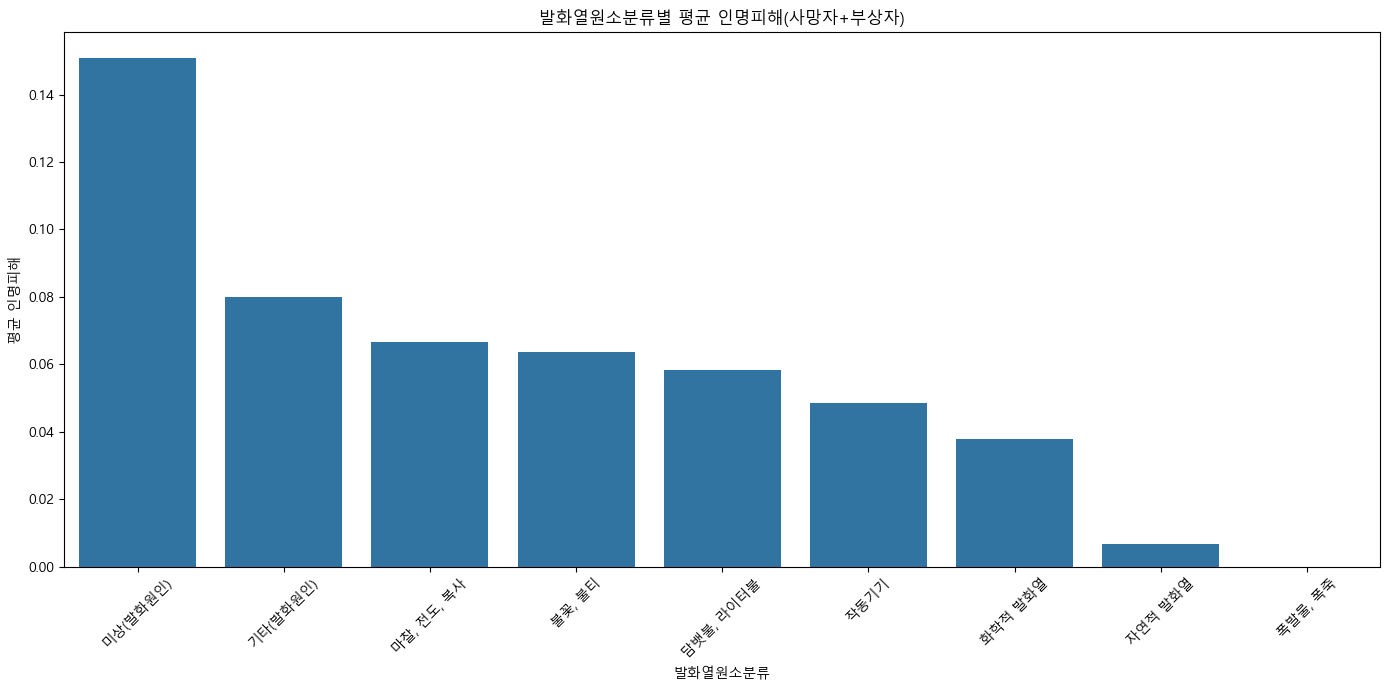

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 한글 폰트 설정 (Windows 기준, 맑은고딕 사용)
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 발화열원소분류별 인명피해(사망자+부상자) 합계 집계
df['TOTAL_HUMAN_DAMAGE'] = df['DTH_CNT'].fillna(0) + df['INJPSN_CNT'].fillna(0)
damage_by_htsrc = df.groupby('IGTN_HTSRC_SCLSF_NM')['TOTAL_HUMAN_DAMAGE'].sum().sort_values(ascending=False)

# 1. 발화열원소분류별 인명피해 합계 시각화
plt.figure(figsize=(14,7))
sns.barplot(x=damage_by_htsrc.index, y=damage_by_htsrc.values)
plt.title('발화열원소분류별 인명피해(사망자+부상자) 합계')
plt.xlabel('발화열원소분류')
plt.ylabel('인명피해 합계')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 발화열원소분류별 평균 인명피해 시각화
avg_damage_by_htsrc = df.groupby('IGTN_HTSRC_SCLSF_NM')['TOTAL_HUMAN_DAMAGE'].mean().sort_values(ascending=False)
plt.figure(figsize=(14,7))
sns.barplot(x=avg_damage_by_htsrc.index, y=avg_damage_by_htsrc.values)
plt.title('발화열원소분류별 평균 인명피해(사망자+부상자)')
plt.xlabel('발화열원소분류')
plt.ylabel('평균 인명피해')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()